# importing necessary depedency

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import k_means


# Data collection and  Analysis

In [59]:
df=pd.read_csv("C:\\Users\\shankar\\Desktop\\Major Project files\\Churn_Modelling.csv")

In [60]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [62]:
df.shape
# finding the number of rows and columns 


(10000, 14)

In [61]:
df.info()
# getting the information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [64]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [65]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [68]:
df.keys()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [77]:
df=df.drop(columns=["Gender"])

In [89]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


# Segmenting the customer according to age and creditScore

In [90]:
df_age_CreditScore=df[['Age',"CreditScore"]]
df_age_CreditScore

,Age,CreditScore
0,42,619
1,41,608
2,42,502
3,39,699
4,43,850
...,...,...
9995,39,771
9996,35,516
9997,36,709
9998,42,772


In [94]:
X_age_creditscore=df_age_CreditScore.values
X_age_creditscore

array([[ 42, 619],
       [ 41, 608],
       [ 42, 502],
       ...,
       [ 36, 709],
       [ 42, 772],
       [ 28, 792]], dtype=int64)

In [78]:
X = df.values
X

array([[6.1900000e+02, 4.2000000e+01, 2.0000000e+00, ..., 1.0000000e+00,
        1.0134888e+05, 1.0000000e+00],
       [6.0800000e+02, 4.1000000e+01, 1.0000000e+00, ..., 1.0000000e+00,
        1.1254258e+05, 0.0000000e+00],
       [5.0200000e+02, 4.2000000e+01, 8.0000000e+00, ..., 0.0000000e+00,
        1.1393157e+05, 1.0000000e+00],
       ...,
       [7.0900000e+02, 3.6000000e+01, 7.0000000e+00, ..., 1.0000000e+00,
        4.2085580e+04, 1.0000000e+00],
       [7.7200000e+02, 4.2000000e+01, 3.0000000e+00, ..., 0.0000000e+00,
        9.2888520e+04, 1.0000000e+00],
       [7.9200000e+02, 2.8000000e+01, 4.0000000e+00, ..., 0.0000000e+00,
        3.8190780e+04, 0.0000000e+00]])

In [101]:
wcss_age_creditScore = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_age_creditscore)
    wcss_age_creditScore.append(kmeans.inertia_)

C:\Users\shankar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shankar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shankar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shankar\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

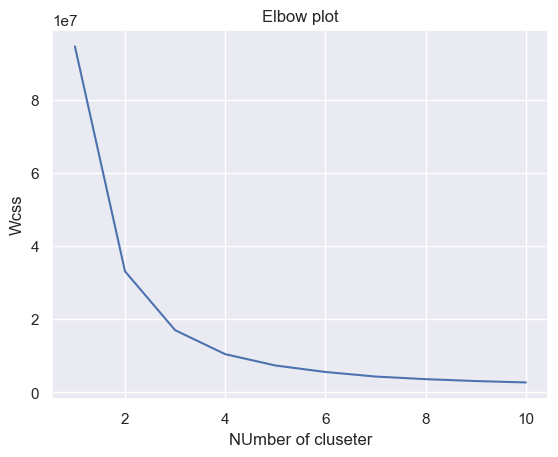

In [103]:
# plotting the elbow figure in the data 
sns.set()
plt.plot(range(1,11),wcss_age_creditScore)
plt.title("Elbow plot")
plt.xlabel("NUmber of cluseter")
plt.ylabel("Wcss")
plt.show()

In [104]:
wcss_age_creditScore

[94509090.55319992,
 33058179.88704543,
 16972586.816558987,
 10415774.81402975,
 7331450.239824751,
 5550136.956997214,
 4303480.511056563,
 3591675.729963659,
 3073711.397666225,
 2690338.400893366]

# The optimum number of cluster is 4

In [107]:
Kmeans=KMeans(n_clusters=4,init="K-means++",random_state=1)
# return a label based on data points
Y_age_creditiScore=kmeans.fit_predict(X_age_creditscore)
Y_age_creditiScore



C:\Users\shankar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 1, 6, ..., 0, 5, 5])

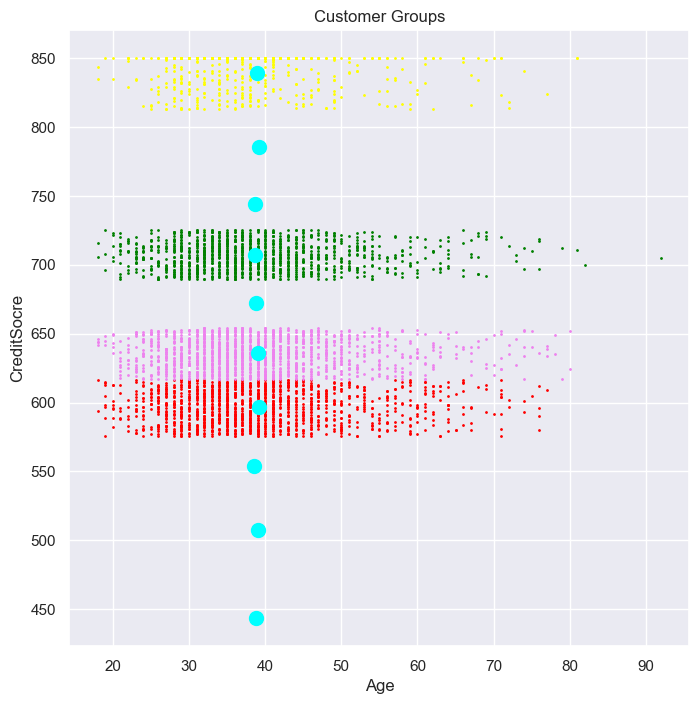

In [108]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X_age_creditscore[Y_age_creditiScore==0,0], X_age_creditscore[Y==0,1], s=1, c='green', label='Cluster 1')
plt.scatter(X_age_creditscore[Y_age_creditiScore==1,0], X_age_creditscore[Y==1,1], s=1, c='red', label='Cluster 2')
plt.scatter(X_age_creditscore[Y_age_creditiScore==2,0], X_age_creditscore[Y==2,1], s=1, c='yellow', label='Cluster 3')
plt.scatter(X_age_creditscore[Y_age_creditiScore==3,0], X_age_creditscore[Y==3,1], s=1, c='violet', label='Cluster 4')
# plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Age')
plt.ylabel('CreditSocre')
plt.show()

# sesgementing the customer according to age and  tenure 

In [110]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [111]:
df_age_tenure=df[['Age',"Tenure"]]
df_age_tenure

,Age,Tenure
0,42,2
1,41,1
2,42,8
3,39,1
4,43,2
...,...,...
9995,39,5
9996,35,10
9997,36,7
9998,42,3


## choosing the correct number of cluster

In [112]:
X_age_tenure=df_age_tenure.values

In [113]:
wcss_age_tenure = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_age_tenure)

    wcss_age_tenure.append(kmeans.inertia_)

C:\Users\shankar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shankar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shankar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shankar\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

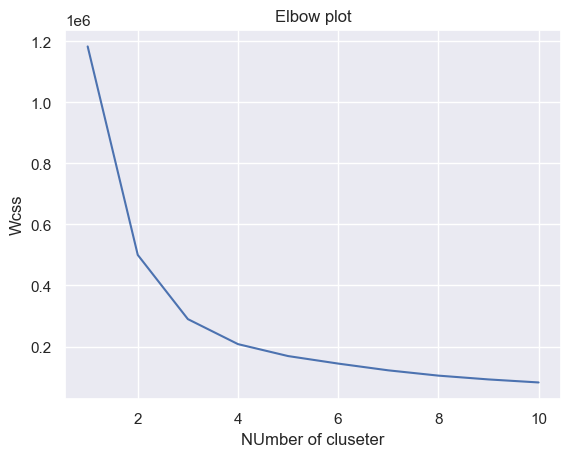

In [114]:
# plotting the elbow figure in the data 
sns.set()
plt.plot(range(1,11),wcss_age_tenure)
plt.title("Elbow plot")
plt.xlabel("NUmber of cluseter")
plt.ylabel("Wcss")
plt.show()

#### from elbow graph we ge the value 4 

In [115]:
Kmeans=KMeans(n_clusters=4,init="K-means++",random_state=1)
# return a label based on data points
Y_age_tenure=kmeans.fit_predict(X_age_tenure)
Y_age_tenure



C:\Users\shankar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 7, ..., 4, 1, 3])

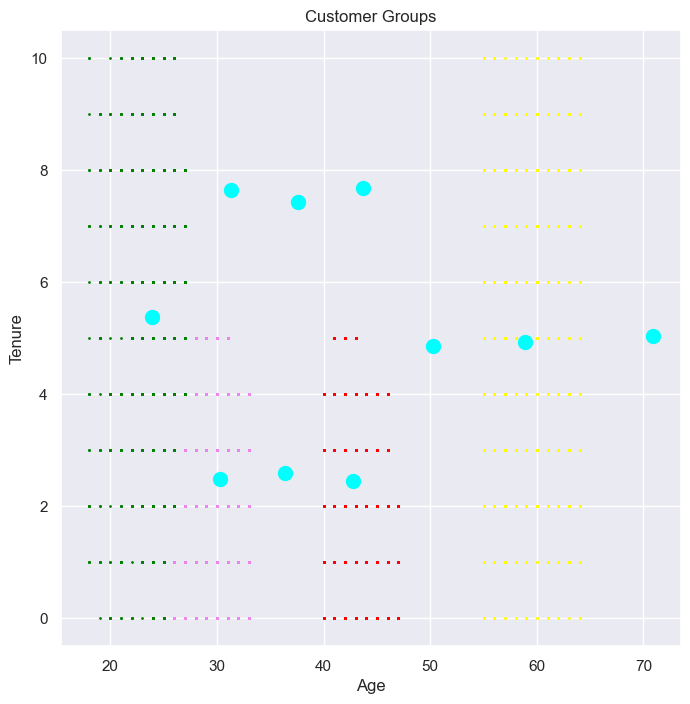

In [116]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X_age_tenure[Y_age_tenure==0,0], X_age_tenure[Y_age_tenure==0,1], s=1, c='green', label='Cluster 1')
plt.scatter(X_age_tenure[Y_age_tenure==1,0], X_age_tenure[Y_age_tenure==1,1], s=1, c='red', label='Cluster 2')
plt.scatter(X_age_tenure[Y_age_tenure==2,0], X_age_tenure[Y_age_tenure==2,1], s=1, c='yellow', label='Cluster 3')
plt.scatter(X_age_tenure[Y_age_tenure==3,0], X_age_tenure[Y_age_tenure==3,1], s=1, c='violet', label='Cluster 4')
# plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Age')
plt.ylabel('Tenure')
plt.show()

In [117]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


# Segmenting the customer based on Age and Number of product 

# choosing the correct number of clusters
#  WCSS -WIth in clusters Sum of square
<!--  --> Elbow method 



In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [80]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

C:\Users\shankar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shankar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shankar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shankar\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

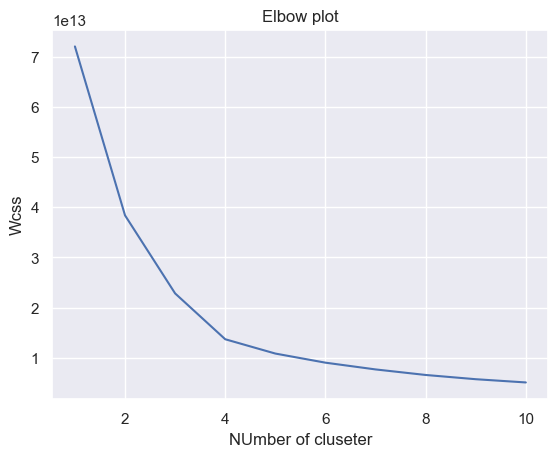

In [81]:
# plotting the elbow figure in the data 
sns.set()
plt.plot(range(1,11),wcss)
plt.title("Elbow plot")
plt.xlabel("NUmber of cluseter")
plt.ylabel("Wcss")
plt.show()

# The optimum number of Cluster of is 5

<!-- #  --> Training the K-means clustering model 

In [82]:
X

array([[6.1900000e+02, 4.2000000e+01, 2.0000000e+00, ..., 1.0000000e+00,
        1.0134888e+05, 1.0000000e+00],
       [6.0800000e+02, 4.1000000e+01, 1.0000000e+00, ..., 1.0000000e+00,
        1.1254258e+05, 0.0000000e+00],
       [5.0200000e+02, 4.2000000e+01, 8.0000000e+00, ..., 0.0000000e+00,
        1.1393157e+05, 1.0000000e+00],
       ...,
       [7.0900000e+02, 3.6000000e+01, 7.0000000e+00, ..., 1.0000000e+00,
        4.2085580e+04, 1.0000000e+00],
       [7.7200000e+02, 4.2000000e+01, 3.0000000e+00, ..., 0.0000000e+00,
        9.2888520e+04, 1.0000000e+00],
       [7.9200000e+02, 2.8000000e+01, 4.0000000e+00, ..., 0.0000000e+00,
        3.8190780e+04, 0.0000000e+00]])

In [83]:
Kmeans=KMeans(n_clusters=4,init="K-means++",random_state=1)
# return a label based on data points
Y=kmeans.fit_predict(X)
Y



C:\Users\shankar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([7, 6, 2, ..., 0, 9, 8])

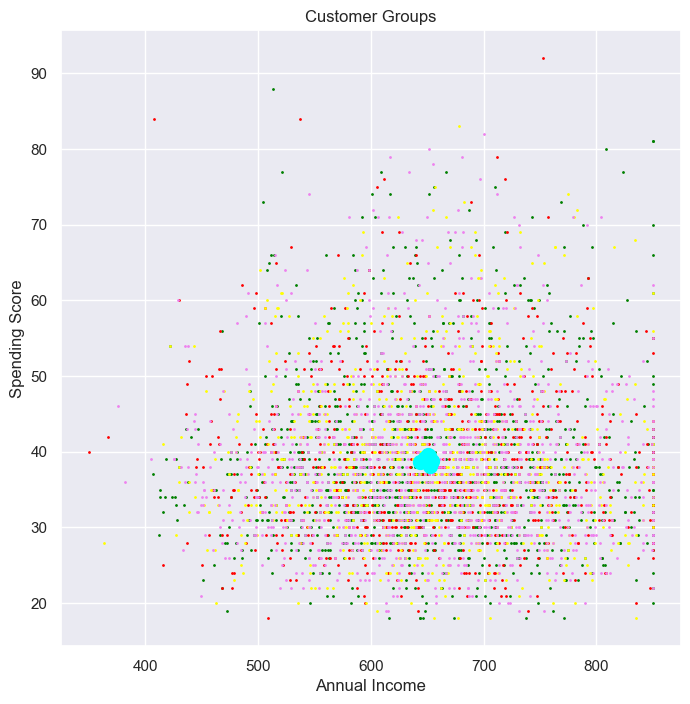

In [88]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=1, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=1, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=1, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=1, c='violet', label='Cluster 4')
# plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()